# Shinkansen Travel Experience

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [103]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted,digits=6))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Unsatisfied', 'Satisfied'], yticklabels=['Unsatisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [5]:
os.getcwd()

'c:\\Users\\jarre\\OneDrive\\Desktop\\Data_Science\\Mugen_Train'

In [6]:
os.chdir(r'C:\Users\jarre\OneDrive\Desktop\Data_Science\Mugen_Train')

In [7]:
os.getcwd()

'c:\\Users\\jarre\\OneDrive\\Desktop\\Data_Science\\Mugen_Train'

In [8]:
!pip install catboost

In [9]:
!pip install ipywidgets

In [10]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [11]:
data_dict = pd.read_excel('Data_Dictionary.xlsx')

|    | Data Dictionary - Travel Data   | Unnamed: 1                                     | Unnamed: 2                                      |
|---:|:--------------------------------|:-----------------------------------------------|:------------------------------------------------|
|  0 | Column Name                     | Column Description                             | Column Value Examples                           |
|  1 | ID                              | The unique ID of the passenger                 | Continuous values like 98800001, 98800002, etc. |
|  2 | Gender                          | The gender of the passenger                    | Male                                            |
|    |                                 |                                                | Female                                          |
|  3 | Customer_Type                   | Loyalty type of the passenger                  | Loyal Customer                                  |
|    |                                 |                                                | Disloyal Customer                               |
|  4 | Age                             | The age of the passenger                       | Continuous values like 48, 52, 9, etc.          |
|  5 | Type_Travel                     | Purpose of travel for the passenger            | Personal Travel                                 |
|    |                                 |                                                | Business Travel                                 |
|  6 | Travel_Class                    | The train class that the passenger traveled in | Business                                        |
|    |                                 |                                                | Eco                                             |
|  7 | Travel_Distance                 | The distance traveled by the passenger         | Continuous values like 272, 780, 853, etc.      |
|  8 | Departure_Delay_in_Mins         | The delay (in minutes) in train departure      | Continuous values like 9, 15, 13, etc.          |
|  9 | Arrival_Delay_in_Mins           | The delay (in minutes) in train arrival        | Continuous values like 0, 15, 18, etc.          |

In [12]:
traveltrain_df = pd.read_csv('Traveldata_train.csv')
surveytrain_df = pd.read_csv('Surveydata_train.csv')
traveltest_df = pd.read_csv('Traveldata_test.csv')
surveytest_df = pd.read_csv('Surveydata_test.csv')

In [13]:
traveltrain_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [14]:
surveytrain_df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


## Data Exploration

#### Travel Training Data

In [15]:
traveltrain_df.columns

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')

In [16]:
# Addressing Whitespace
traveltrain_columns = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']
for col in traveltrain_columns:
  traveltrain_df[col].str.strip()

In [17]:
traveltrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


- 94378 observations in traveltrain data set
- 9 columns of data
- 4 categorical variables (Gender, Customer_Type, Type_Travel, Travel_Class)
- 4 numerical columns (ID, Age, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins)
- There are null values in (Gender, Customer_Type, Age, Type_Travel, Departure_Delay_in_Mins, Arrival_Delay_in_Mins)
- We will use ID column to merge data sets then drop as it provides no value to algo

In [18]:
traveltrain_df.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

There are two unique values for Gender, Customer_Type, Type_Travel and Travel_class

In [19]:
traveltrain_categories = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']
for cat in traveltrain_categories:
  print(traveltrain_df[cat].value_counts(normalize = True))
  print("------------------------------")

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
------------------------------
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
------------------------------
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
------------------------------
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
------------------------------


- Approximately half of cutomers are M/F
- ~81.7% of customers are loyal
- ~68.84% of trips are for business travel
- ~52.28% of trips are economy class
- There is a discrepancy between customers travelling for business and the percentage of business class rides are taken (marketing note)

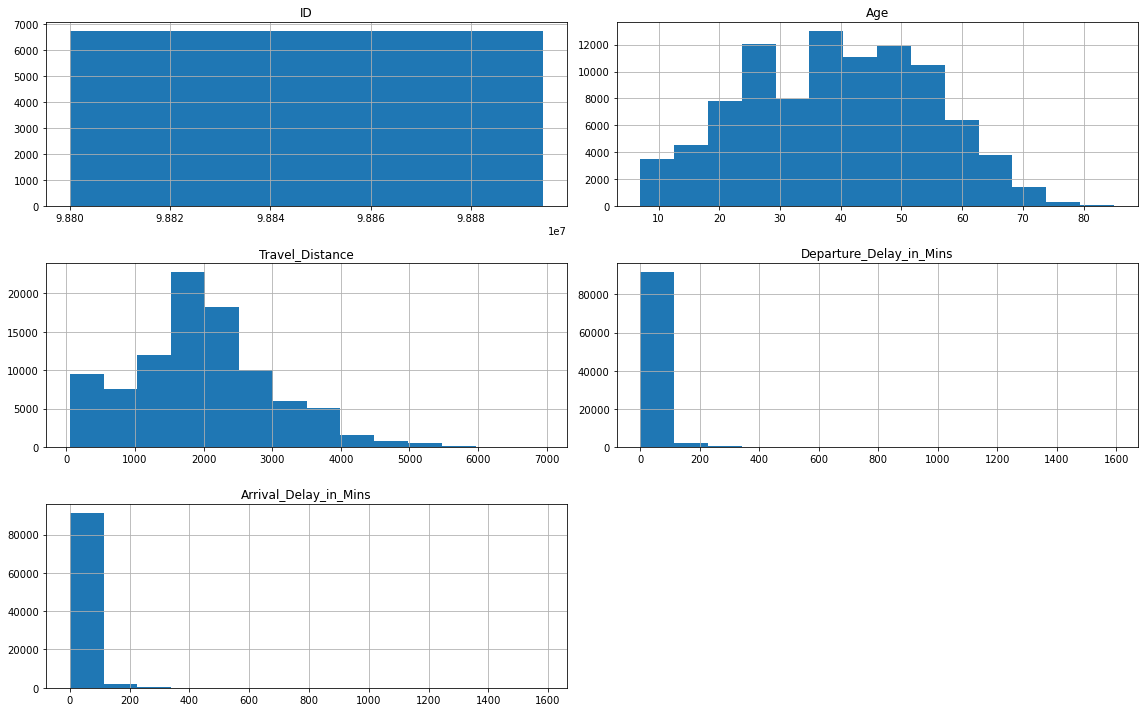

In [20]:
traveltrain_df.hist(bins = 14,figsize = (16,10))
plt.tight_layout()

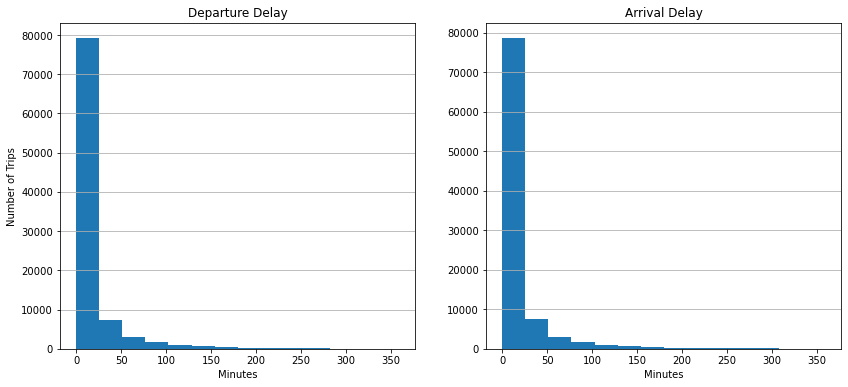

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (14, 6)) 
ax[0].hist(traveltrain_df[traveltrain_df['Departure_Delay_in_Mins']<360]['Departure_Delay_in_Mins'], bins = 14)
ax[1].hist(traveltrain_df[traveltrain_df['Arrival_Delay_in_Mins']<360]['Arrival_Delay_in_Mins'], bins = 14)

ax[0].set_title('Departure Delay')
ax[1].set_title('Arrival Delay')

ax[0].set_xlabel('Minutes')
ax[1].set_xlabel('Minutes')

ax[0].set_ylabel('Number of Trips')

ax[0].grid(visible = True, axis = 'y')
ax[1].grid(visible = True, axis = 'y')

plt.show()

Due to the extreme outlier this graph is intended to show the distribution of more common delays. The majority of delays fall under 50 minutes.

In [22]:
traveltrain_df['Customer_Type'].value_counts()

Loyal Customer       69823
Disloyal Customer    15605
Name: Customer_Type, dtype: int64

In [23]:
traveltrain_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


- Age is normally approximately distributed around 39.42 years
- Travel Distance is aprroximately normally distributed around 1978.89 miles
- At leat half of trips had no departure or arrival delay
- 25% of trips had at least a 12 minute departure delay
- 25% of trips had at least a 13 minute arrival delay
- The maximum departure and arrival delays were over a day
- Departure and arrival delay look like they may be correlated

#### Addressing Null Values

In [24]:
traveltrain_df.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

###### 33 missing in Age will be replaced with median
###### 57 missing for Departure_Delay and 357 missing for Arrival Delay will be replaced with median


In [25]:
# Replacing Departure, Arrival, and Age with median values
traveltrain_df['Departure_Delay_in_Mins'] = traveltrain_df['Departure_Delay_in_Mins'].fillna(traveltrain_df['Departure_Delay_in_Mins'].median())
traveltrain_df['Arrival_Delay_in_Mins'] = traveltrain_df['Arrival_Delay_in_Mins'].fillna(traveltrain_df['Arrival_Delay_in_Mins'].median())
traveltrain_df['Age'] = traveltrain_df['Age'].fillna(traveltrain_df['Age'].median())

In [26]:
traveltrain_df.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                           0
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins       0
Arrival_Delay_in_Mins         0
dtype: int64

## Survey Training Data

In [27]:
surveytrain_df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [28]:
surveytrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [29]:
surveytrain_df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

There are null values in all columns except for ID, Overall experience, and seat class. The outcome variable is overall experience. 

In [30]:
# Addressing Whitespace
surveytrain_columns = ['Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding']
for col in surveytrain_columns:
  surveytrain_df[col].str.strip()

In [31]:
for col in surveytrain_columns:
  print(surveytrain_df[col].value_counts(normalize = True))
  print('------------------------------')

Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
------------------------------
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
------------------------------
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: Arrival_Time_Convenient, dtype: float64
------------------------------
Acceptable           0.215652
Needs Improvement    0.209930
Good                 0.209825
Poor                 0.161821
Excellent            0.157115
Extremely Poor       0.045657
Name: Catering, dtype: float64
------------------------------
Manageable           0.256208
Convenient           0.232244
Needs Improvement    0.189000
Inconvenient         0.174342
Very Convenient      0.1481

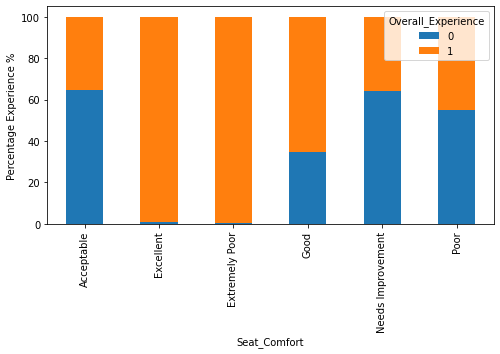

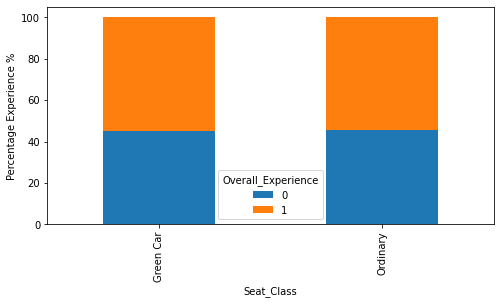

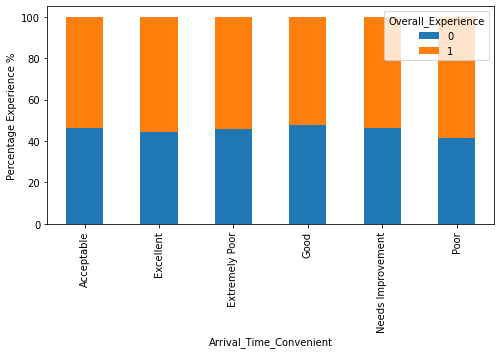

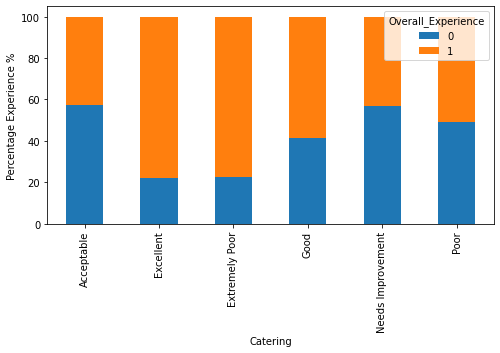

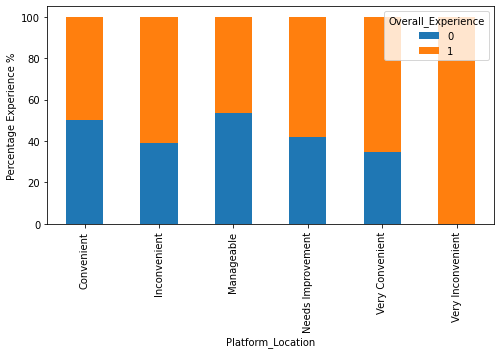

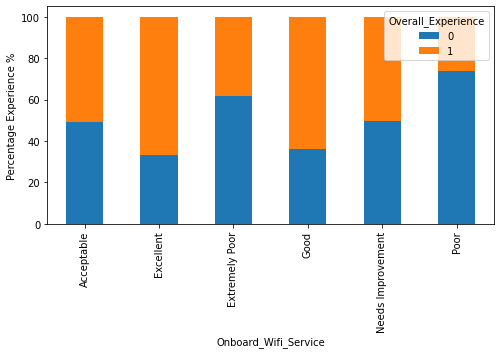

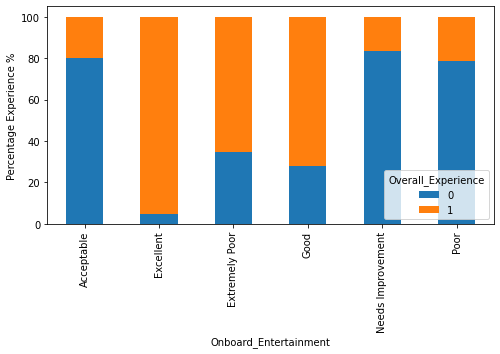

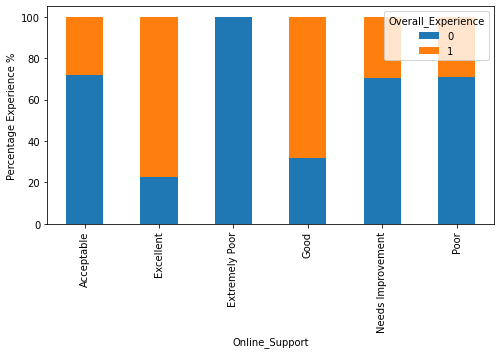

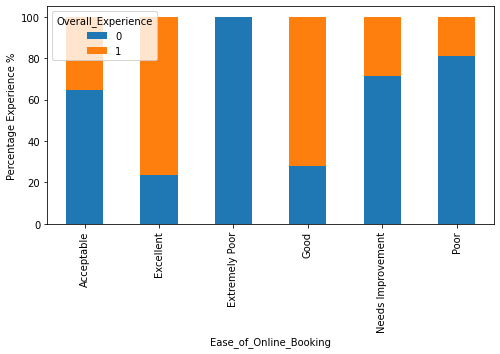

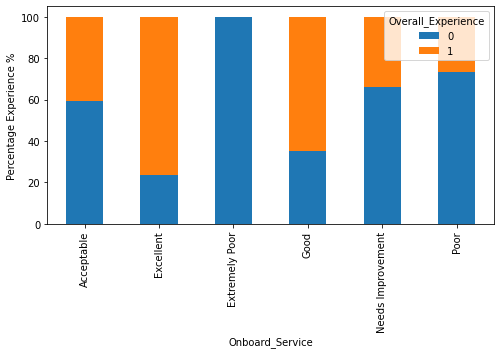

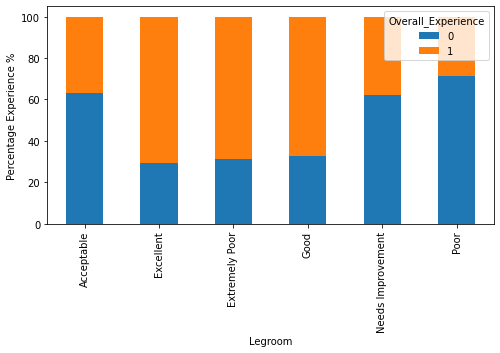

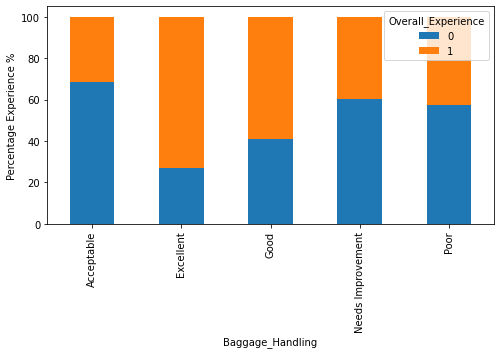

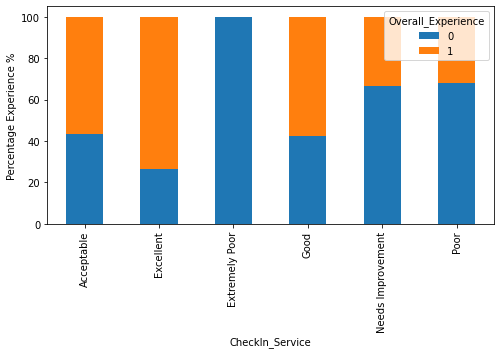

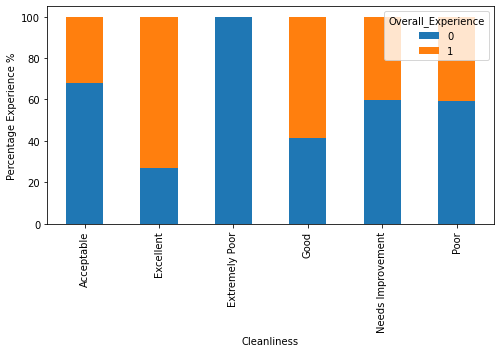

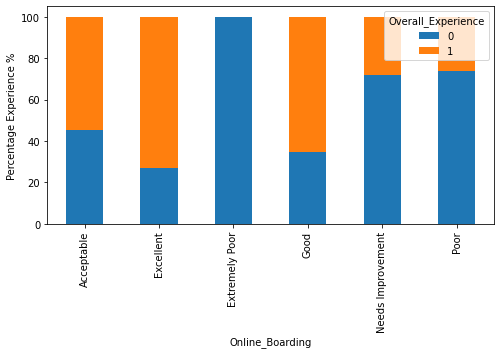

In [32]:
for i in surveytrain_columns:
      (pd.crosstab(surveytrain_df[i],surveytrain_df['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
      plt.ylabel('Percentage Experience %')

#### Merge Dataframes

In [33]:
merged_df = traveltrain_df.merge(surveytrain_df, how = 'left', on = 'ID')

In [34]:
merged_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [35]:
#separating numerical and categorical columns
num_cols = merged_df.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = merged_df.select_dtypes(include = 'object').columns

In [36]:
merge_copy = merged_df.copy()

### Encoding Categorical Columns

In [37]:
cat_dict = {'Extremely Poor' : 0,  'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5}

six_features = ['Online_Boarding', 'Cleanliness', 'CheckIn_Service', 'Baggage_Handling', 'Legroom', 
                'Onboard_Service', 'Ease_of_Online_Booking', 'Online_Support', 'Onboard_Entertainment',
                'Onboard_Wifi_Service', 'Catering', 'Arrival_Time_Convenient', 'Seat_Comfort']

for col in six_features:
  merged_df[col] = merged_df[col].map(cat_dict)

merged_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [38]:
"""
Manageable           24173
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981
Very Inconvenient        2
"""

Travel_Class_Dict = {'Eco' : 0, 'Business' : 1}
Type_Travel_Dict = {'Personal Travel' : 0, 'Business Travel' : 1}
Cust_Type_Dict = {'Disloyal Customer' : 0, 'Loyal Customer' : 1}
Gender_Dict = {'Male' : 0, 'Female' : 1}
Platform_loc_dict = {'Very Inconvenient' : 0, 'Inconvenient' : 1, 'Needs Improvement' : 2,
                     'Manageable' : 3, 'Convenient' : 4, 'Very Convenient' : 5}
Seat_Class_Dict = {'Ordinary':0, 'Green Car':1}

merged_df['Seat_Class'] = merged_df['Seat_Class'].map(Seat_Class_Dict)
merged_df['Gender'] = merged_df['Gender'].map(Gender_Dict)
merged_df['Customer_Type'] = merged_df['Customer_Type'].map(Cust_Type_Dict)
merged_df['Type_Travel'] = merged_df['Type_Travel'].map(Type_Travel_Dict)
merged_df['Travel_Class'] = merged_df['Travel_Class'].map(Travel_Class_Dict)
merged_df['Platform_Location'] = merged_df['Platform_Location'].map(Platform_loc_dict)

In [39]:
merged_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [40]:
#Shows that items were properly encoded
merge_copy.isnull().sum() == merged_df.isnull().sum()

ID                         True
Gender                     True
Customer_Type              True
Age                        True
Type_Travel                True
Travel_Class               True
Travel_Distance            True
Departure_Delay_in_Mins    True
Arrival_Delay_in_Mins      True
Overall_Experience         True
Seat_Comfort               True
Seat_Class                 True
Arrival_Time_Convenient    True
Catering                   True
Platform_Location          True
Onboard_Wifi_Service       True
Onboard_Entertainment      True
Online_Support             True
Ease_of_Online_Booking     True
Onboard_Service            True
Legroom                    True
Baggage_Handling           True
CheckIn_Service            True
Cleanliness                True
Online_Boarding            True
dtype: bool

### Scaling Features

In [41]:
scaled_df = merged_df.copy()
scaled_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [42]:
#Drop ID Column
scaled_df = scaled_df.drop(["ID"], axis = 1)
scaled_df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,1.0,1.0,52.0,NaN,1,272,0.0,5.0,0,2.0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,0.0,1.0,48.0,0.0,0,2200,9.0,0.0,0,1.0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,1.0,1.0,43.0,1.0,1,1061,77.0,119.0,1,2.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,1.0,1.0,44.0,1.0,1,780,13.0,18.0,0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,1.0,1.0,50.0,1.0,1,1981,0.0,0.0,1,3.0,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [43]:
# Instantiate Standard scalar and fit scaled dataframe to it
sc = StandardScaler()
scaled_values =  sc.fit_transform(scaled_df)

In [44]:
# Create a dataframe with scaled values 
scaled_df2 = pd.DataFrame(data=scaled_values, columns=scaled_df.columns)
scaled_df2.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0.986015,0.472751,0.832356,NaN,1.046703,-1.660469,-0.383916,-0.259227,-1.098107,-0.602636,...,0.569735,-1.026985,-0.396929,-1.126054,-1.159418,-0.373761,-1.467309,0.521780,-1.479258,-1.811867
1,-1.014183,0.472751,0.567699,-1.486258,-0.955380,0.215099,-0.147874,-0.389511,-1.098107,-1.320760,...,0.569735,-1.769827,0.367499,0.405880,1.205456,-1.147603,-2.332067,-1.065143,0.256880,0.499285
2,0.986015,0.472751,0.236878,0.672831,1.046703,-0.892926,1.635557,2.711265,0.910658,-0.602636,...,-0.945975,0.458697,1.131928,1.171847,1.205456,1.173923,1.126965,0.521780,1.124950,1.269668
3,0.986015,0.472751,0.303042,0.672831,1.046703,-1.166284,-0.042966,0.079514,-1.098107,0.115487,...,-0.188120,-1.026985,-0.396929,-0.360087,-0.371127,-0.373761,-0.602551,0.521780,-0.611189,-0.271099
4,0.986015,0.472751,0.700027,0.672831,1.046703,0.002054,-0.383916,-0.389511,0.910658,0.115487,...,-0.945975,0.458697,1.131928,0.405880,0.417164,0.400081,0.262207,0.521780,0.256880,0.499285


### KNN Imputation after scaling

In [49]:
#Impute values with KNN imputation
imputer2 = KNNImputer(n_neighbors=15)
KNN_scaled = imputer2.fit_transform(scaled_df2)

In [50]:
KNN_scaled

array([[ 0.98601536,  0.47275119,  0.83235563, ...,  0.52178041,
        -1.47925834, -1.81186658],
       [-1.01418298,  0.47275119,  0.56769881, ..., -1.06514285,
         0.25688039,  0.49928452],
       [ 0.98601536,  0.47275119,  0.23687779, ...,  0.52178041,
         1.12494976,  1.26966822],
       ...,
       [-1.01418298,  0.47275119,  1.56016187, ..., -0.27168122,
         0.25688039, -0.27109918],
       [-1.01418298,  0.47275119, -1.54955572, ...,  0.52178041,
         1.12494976,  0.49928452],
       [-1.01418298,  0.47275119,  0.96468404, ..., -1.85860448,
         0.25688039, -0.27109918]])

In [51]:
# Create a dataframe with new values
KNN_df = pd.DataFrame(data=KNN_scaled, columns= scaled_df2.columns)
KNN_df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0.986015,0.472751,0.832356,0.672831,1.046703,-1.660469,-0.383916,-0.259227,-1.098107,-0.602636,...,0.569735,-1.026985,-0.396929,-1.126054,-1.159418,-0.373761,-1.467309,0.521780,-1.479258,-1.811867
1,-1.014183,0.472751,0.567699,-1.486258,-0.955380,0.215099,-0.147874,-0.389511,-1.098107,-1.320760,...,0.569735,-1.769827,0.367499,0.405880,1.205456,-1.147603,-2.332067,-1.065143,0.256880,0.499285
2,0.986015,0.472751,0.236878,0.672831,1.046703,-0.892926,1.635557,2.711265,0.910658,-0.602636,...,-0.945975,0.458697,1.131928,1.171847,1.205456,1.173923,1.126965,0.521780,1.124950,1.269668
3,0.986015,0.472751,0.303042,0.672831,1.046703,-1.166284,-0.042966,0.079514,-1.098107,0.115487,...,-0.188120,-1.026985,-0.396929,-0.360087,-0.371127,-0.373761,-0.602551,0.521780,-0.611189,-0.271099
4,0.986015,0.472751,0.700027,0.672831,1.046703,0.002054,-0.383916,-0.389511,0.910658,0.115487,...,-0.945975,0.458697,1.131928,0.405880,0.417164,0.400081,0.262207,0.521780,0.256880,0.499285


In [52]:
KNN_df['Overall_Experience']

0       -1.098107
1       -1.098107
2        0.910658
3       -1.098107
4        0.910658
           ...   
94374   -1.098107
94375    0.910658
94376    0.910658
94377   -1.098107
94378   -1.098107
Name: Overall_Experience, Length: 94379, dtype: float64

In [53]:
# Set X to scaled values and y to Known Overall Experience values
X = KNN_df.drop(['Overall_Experience'],axis=1)
y = scaled_df['Overall_Experience']

In [54]:
# Fit x and y to logistic regression model
lg2 = LogisticRegression(random_state=1)
lg2.fit(X,y)

LogisticRegression(random_state=1)

In [55]:
# Predict values for the data set (Should we use a test set?)
y_lg2_pred = lg2.predict(X)

              precision    recall  f1-score   support

           0    0.82079   0.81774   0.81927     42786
           1    0.84932   0.85194   0.85063     51593

    accuracy                        0.83644     94379
   macro avg    0.83506   0.83484   0.83495     94379
weighted avg    0.83639   0.83644   0.83641     94379



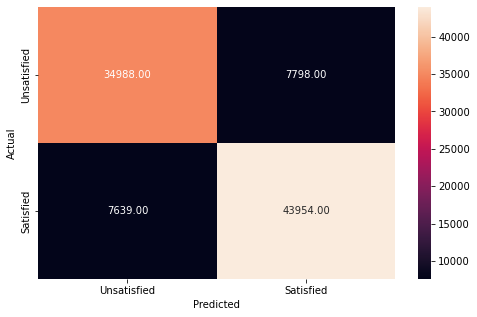

In [56]:
metrics_score(y,y_lg2_pred)

In [57]:
lg2.coef_.shape

(1, 23)

In [58]:
lg2_coef = lg2.coef_.reshape(23,)

In [59]:
features_lg2 = dict(zip(X.columns,lg2_coef))

In [60]:
features_lg2

{'Gender': 0.4880391486639135,
 'Customer_Type': 0.7980398776079618,
 'Age': -0.13086126754599,
 'Type_Travel': 0.3685907156984445,
 'Travel_Class': 0.36287401555000187,
 'Travel_Distance': -0.11487107680901226,
 'Departure_Delay_in_Mins': 0.06635675698608401,
 'Arrival_Delay_in_Mins': -0.2701863152175364,
 'Seat_Comfort': 0.40260342064051985,
 'Seat_Class': -0.006447997337781311,
 'Arrival_Time_Convenient': -0.3323652887690311,
 'Catering': -0.2982827308837404,
 'Platform_Location': 0.15344793273132568,
 'Onboard_Wifi_Service': -0.08680999556363221,
 'Onboard_Entertainment': 0.9181919757346655,
 'Online_Support': 0.1357048799579265,
 'Ease_of_Online_Booking': 0.2723756318046597,
 'Onboard_Service': 0.4352653509202405,
 'Legroom': 0.27528829848190334,
 'Baggage_Handling': 0.1302407021166952,
 'CheckIn_Service': 0.37094931356890276,
 'Cleanliness': 0.07469013034526877,
 'Online_Boarding': 0.22382331422308438}

<BarContainer object of 23 artists>

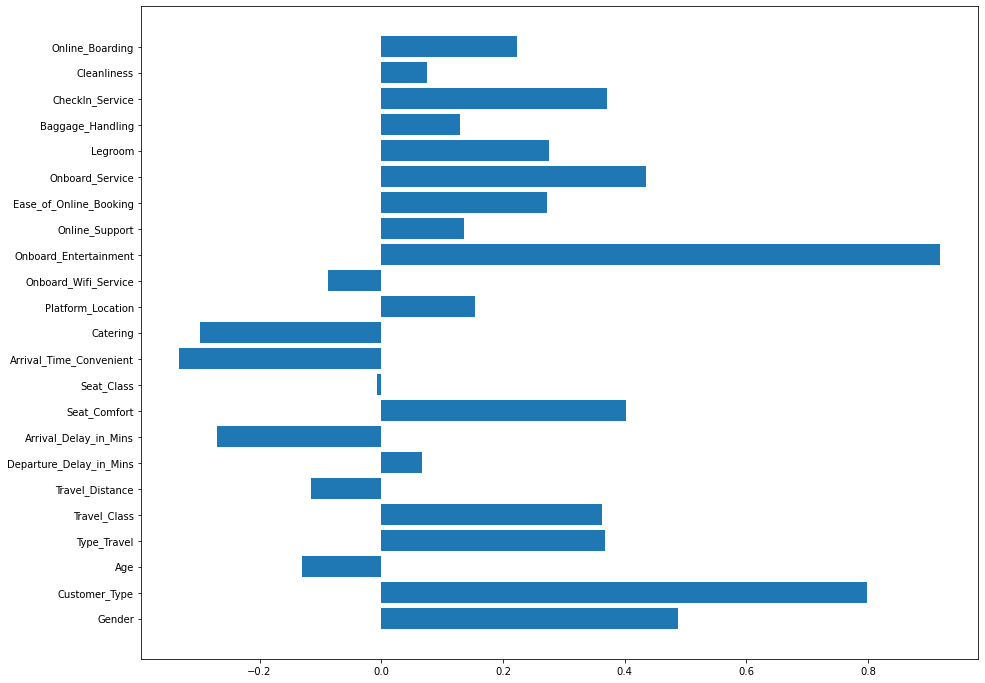

In [61]:
fig3, ax3 = plt.subplots(figsize=(15,12))
ax3.barh(list(features_lg2.keys()),list(features_lg2.values()))

Three biggest predictors of a positive experience are Onboard_Entertainment, Customer_Type, and Gender

The biggest predictors of a negative experience are Arrival_Time_Convenient, Catering, and Arrival_Delay_in_Mins.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

              precision    recall  f1-score   support

           0    0.80501   0.79542   0.80019     12836
           1    0.83200   0.84022   0.83609     15478

    accuracy                        0.81991     28314
   macro avg    0.81851   0.81782   0.81814     28314
weighted avg    0.81977   0.81991   0.81982     28314



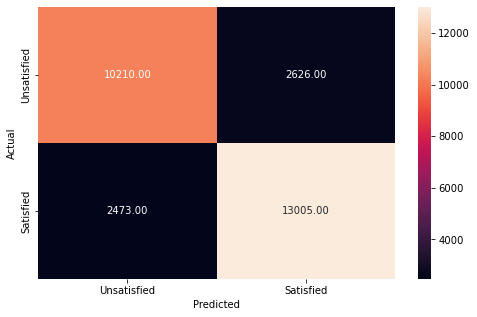

In [63]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

metrics_score(y_test, y_pred)

## Support Vector Classifier

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12919
           1       0.95      0.95      0.95     15395

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



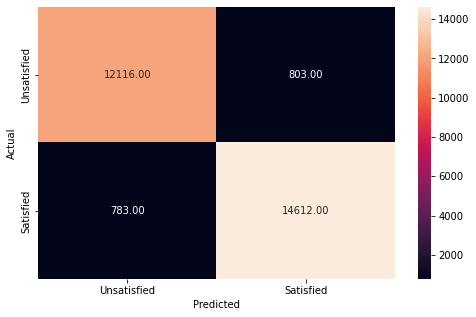

In [150]:
svc = SVC()

y_pred = svc.fit(X_train, y_train).predict(X_test)

metrics_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12919
           1       0.95      0.95      0.95     15395

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



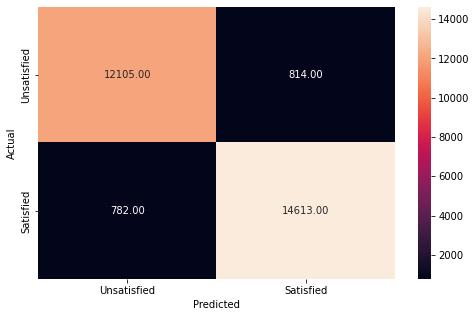

In [ ]:
svc = SVC(gamma = 'auto')

y_pred = svc.fit(X_train, y_train).predict(X_test)

metrics_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12919
           1       0.95      0.95      0.95     15395

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



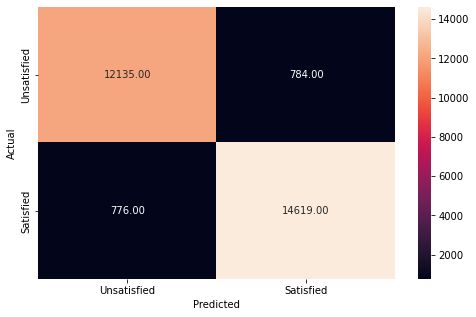

In [ ]:
svc = SVC(C = 1.2)

y_pred = svc.fit(X_train, y_train).predict(X_test)

metrics_score(y_test, y_pred)

In [ ]:
svc = SVC(kernel = 'poly', C = 1.2)

y_pred = svc.fit(X_train, y_train).predict(X_test)

metrics_score(y_test, y_pred)

In [ ]:
param_grid = {'C': [0.1, 1, 5, 10, 50, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']}
 

## Random Forest Training Data

Accuracy: 0.925 (0.002)
              precision    recall  f1-score   support

           0   0.919815  0.912434  0.916109     12836
           1   0.927861  0.934035  0.930938     15478

    accuracy                       0.924242     28314
   macro avg   0.923838  0.923235  0.923524     28314
weighted avg   0.924213  0.924242  0.924215     28314



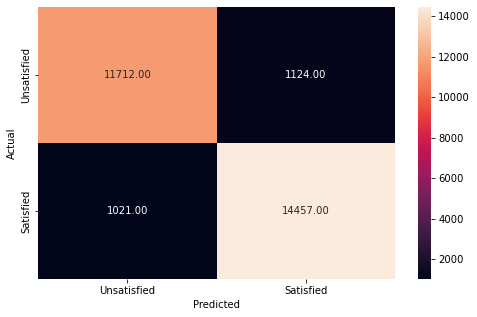

In [124]:
RC_model = RandomForestClassifier(n_estimators = 1800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 9, bootstrap = False)
cv = RepeatedStratifiedKFold(n_splits=5)

n_scores = cross_val_score(RC_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

y_pred_testRC = RC_model.fit(X_train, y_train).predict(X_test)
metrics_score(y_test,y_pred_testRC)

## Cat Boosting

In [68]:
from catboost import CatBoostClassifier, Pool

Learning rate set to 0.061668
0:	learn: 0.6190390	total: 13.2ms	remaining: 13.2s
1:	learn: 0.5591311	total: 25.7ms	remaining: 12.8s
2:	learn: 0.5124560	total: 39.2ms	remaining: 13s
3:	learn: 0.4768381	total: 51.3ms	remaining: 12.8s
4:	learn: 0.4468562	total: 65.7ms	remaining: 13.1s
5:	learn: 0.4189000	total: 78.3ms	remaining: 13s
6:	learn: 0.3976161	total: 89.8ms	remaining: 12.7s
7:	learn: 0.3764816	total: 102ms	remaining: 12.6s
8:	learn: 0.3564464	total: 115ms	remaining: 12.6s
9:	learn: 0.3360164	total: 128ms	remaining: 12.7s
10:	learn: 0.3250371	total: 142ms	remaining: 12.8s
11:	learn: 0.3131340	total: 157ms	remaining: 12.9s
12:	learn: 0.3042478	total: 173ms	remaining: 13.1s
13:	learn: 0.2957665	total: 187ms	remaining: 13.2s
14:	learn: 0.2865149	total: 278ms	remaining: 18.2s
15:	learn: 0.2799090	total: 399ms	remaining: 24.6s
16:	learn: 0.2746158	total: 457ms	remaining: 26.4s
17:	learn: 0.2651804	total: 516ms	remaining: 28.1s
18:	learn: 0.2569561	total: 564ms	remaining: 29.1s
19:	lear

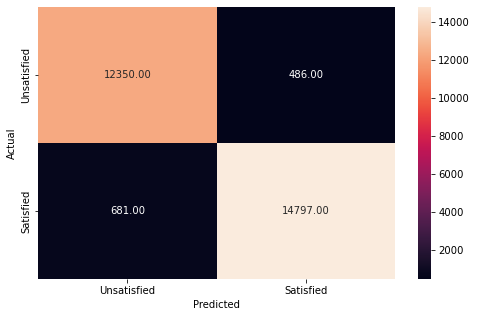

In [92]:
training_data = Pool(data=X_train,label=y_train)
cat = CatBoostClassifier()
y_predcat = cat.fit(training_data).predict(X_test)
metrics_score(y_test, y_predcat)

#### Testing stuff

0:	learn: 0.8017558	total: 19.9ms	remaining: 39.9s
1:	learn: 0.8225233	total: 37.6ms	remaining: 37.5s
2:	learn: 0.8471203	total: 54.5ms	remaining: 36.3s
3:	learn: 0.8685991	total: 71ms	remaining: 35.4s
4:	learn: 0.8955877	total: 87.4ms	remaining: 34.9s
5:	learn: 0.9015061	total: 103ms	remaining: 34.2s
6:	learn: 0.9050481	total: 120ms	remaining: 34.3s
7:	learn: 0.9104064	total: 136ms	remaining: 33.9s
8:	learn: 0.9123742	total: 152ms	remaining: 33.5s
9:	learn: 0.9195035	total: 170ms	remaining: 33.8s
10:	learn: 0.9229244	total: 187ms	remaining: 33.8s
11:	learn: 0.9245743	total: 204ms	remaining: 33.9s
12:	learn: 0.9263453	total: 222ms	remaining: 34s
13:	learn: 0.9287217	total: 240ms	remaining: 34.1s
14:	learn: 0.9346401	total: 260ms	remaining: 34.4s
15:	learn: 0.9362143	total: 280ms	remaining: 34.7s
16:	learn: 0.9375615	total: 299ms	remaining: 34.9s
17:	learn: 0.9381215	total: 317ms	remaining: 34.9s
18:	learn: 0.9384091	total: 335ms	remaining: 34.9s
19:	learn: 0.9391357	total: 353ms	remain

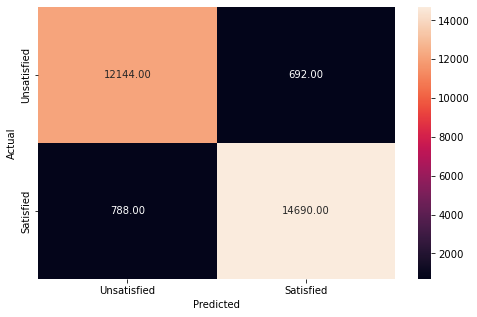

In [148]:
training_data = Pool(data=X_train,label=y_train)
cat = CatBoostClassifier(iterations=2000,learning_rate=.85,eval_metric='Accuracy', loss_function='CrossEntropy',
 feature_weights={'Departure_Delay_in_Mins':1.3,'Arrival_Delay_in_Mins':1.3},depth=9)
y_predcat = cat.fit(training_data).predict(X_test)
metrics_score(y_test, y_predcat)

In [125]:
cat.feature_importances_

array([ 4.21910574,  5.61753291,  4.86912985,  8.21470912,  3.51139944,
        3.94694844,  1.2371687 ,  1.8830496 , 18.00932092,  0.94501893,
        3.36923634,  3.07087591,  4.97265224,  1.65469614,  6.52639746,
        3.82760047,  3.42056409,  3.26578317,  2.95782756,  4.5365676 ,
        4.01214927,  3.49976511,  2.43250101])

In [136]:
X.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

### Tuned Parameters

0:	learn: 0.5885729	total: 129ms	remaining: 3m 12s
1:	learn: 0.5124349	total: 227ms	remaining: 2m 50s
2:	learn: 0.4592421	total: 333ms	remaining: 2m 46s
3:	learn: 0.4238246	total: 436ms	remaining: 2m 43s
4:	learn: 0.3855029	total: 583ms	remaining: 2m 54s
5:	learn: 0.3601870	total: 707ms	remaining: 2m 55s
6:	learn: 0.3411112	total: 767ms	remaining: 2m 43s
7:	learn: 0.3264688	total: 843ms	remaining: 2m 37s
8:	learn: 0.3071017	total: 911ms	remaining: 2m 30s
9:	learn: 0.2919810	total: 990ms	remaining: 2m 27s
10:	learn: 0.2756039	total: 1.06s	remaining: 2m 23s
11:	learn: 0.2668025	total: 1.13s	remaining: 2m 19s
12:	learn: 0.2543317	total: 1.17s	remaining: 2m 13s
13:	learn: 0.2428051	total: 1.2s	remaining: 2m 7s
14:	learn: 0.2372219	total: 1.24s	remaining: 2m 2s
15:	learn: 0.2320718	total: 1.28s	remaining: 1m 58s
16:	learn: 0.2263400	total: 1.33s	remaining: 1m 55s
17:	learn: 0.2222347	total: 1.37s	remaining: 1m 52s
18:	learn: 0.2180895	total: 1.42s	remaining: 1m 50s
19:	learn: 0.2140819	tota

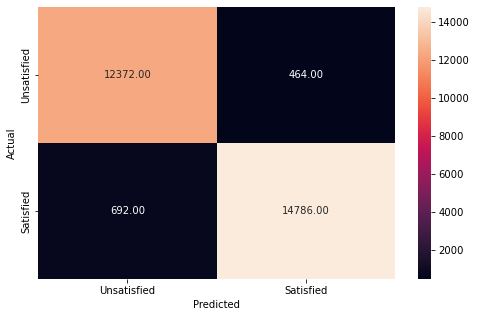

In [100]:
training_data = Pool(data=X_train,label=y_train)
cat = CatBoostClassifier(iterations=1500,learning_rate=.09, loss_function='Logloss')
y_predcat = cat.fit(training_data).predict(X_test)
metrics_score(y_test, y_predcat)

0:	learn: 0.5834243	total: 15.5ms	remaining: 23.2s
1:	learn: 0.5050310	total: 34.2ms	remaining: 25.6s
2:	learn: 0.4510344	total: 50.5ms	remaining: 25.2s
3:	learn: 0.4151876	total: 68.3ms	remaining: 25.5s
4:	learn: 0.3855826	total: 87.8ms	remaining: 26.3s
5:	learn: 0.3549408	total: 106ms	remaining: 26.5s
6:	learn: 0.3303945	total: 128ms	remaining: 27.3s
7:	learn: 0.3128740	total: 148ms	remaining: 27.7s
8:	learn: 0.2925199	total: 172ms	remaining: 28.5s
9:	learn: 0.2796092	total: 196ms	remaining: 29.2s
10:	learn: 0.2663513	total: 214ms	remaining: 29s
11:	learn: 0.2566580	total: 233ms	remaining: 28.8s
12:	learn: 0.2470606	total: 252ms	remaining: 28.8s
13:	learn: 0.2377237	total: 281ms	remaining: 29.8s
14:	learn: 0.2327439	total: 308ms	remaining: 30.5s
15:	learn: 0.2263851	total: 331ms	remaining: 30.7s
16:	learn: 0.2192108	total: 353ms	remaining: 30.8s
17:	learn: 0.2152644	total: 376ms	remaining: 31s
18:	learn: 0.2123006	total: 397ms	remaining: 30.9s
19:	learn: 0.2077402	total: 524ms	remain

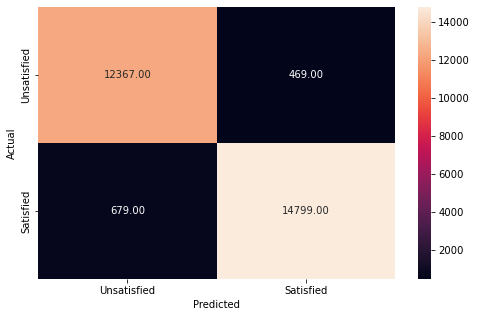

In [104]:
cat = CatBoostClassifier(iterations=1500,learning_rate=.095, loss_function='CrossEntropy')
y_predcat = cat.fit(training_data).predict(X_test)
metrics_score(y_test, y_predcat)

In [121]:
training_data = Pool(data=X_train,label=y_train)
cat = CatBoostClassifier(iterations = 1200, learning_rate=.085, use_best_model = True, eval_metric = 'Accuracy', loss_function='CrossEntropy',depth=9)

y_predcat_trial2 = cat.fit(training_data, eval_set = Pool(X_test, y_test)).predict(X_test)

0:	learn: 0.9075002	test: 0.9051000	best: 0.9051000 (0)	total: 49.4ms	remaining: 59.2s
1:	learn: 0.9108000	test: 0.9081373	best: 0.9081373 (1)	total: 92.5ms	remaining: 55.4s
2:	learn: 0.9129191	test: 0.9092675	best: 0.9092675 (2)	total: 135ms	remaining: 53.8s
3:	learn: 0.9218194	test: 0.9198276	best: 0.9198276 (3)	total: 191ms	remaining: 57.1s
4:	learn: 0.9220313	test: 0.9202161	best: 0.9202161 (4)	total: 244ms	remaining: 58.3s
5:	learn: 0.9234088	test: 0.9220174	best: 0.9220174 (5)	total: 296ms	remaining: 59s
6:	learn: 0.9238931	test: 0.9223706	best: 0.9223706 (6)	total: 446ms	remaining: 1m 15s
7:	learn: 0.9276167	test: 0.9251607	best: 0.9251607 (7)	total: 623ms	remaining: 1m 32s
8:	learn: 0.9294331	test: 0.9256552	best: 0.9256552 (8)	total: 705ms	remaining: 1m 33s
9:	learn: 0.9306289	test: 0.9265028	best: 0.9265028 (9)	total: 765ms	remaining: 1m 31s
10:	learn: 0.9338379	test: 0.9295048	best: 0.9295048 (10)	total: 815ms	remaining: 1m 28s
11:	learn: 0.9338833	test: 0.9297874	best: 0.92

### Clean Test Data

In [64]:
from IPython.display import display

In [65]:
survey_testdf = pd.read_csv('Surveydata_test.csv')
travel_testdf = pd.read_csv('Traveldata_test.csv')

#This function takes in a travel and survey dataset and preps data to be run into ML algorithims. This returns data and IDs
def cleantest(data_travel,data_survey,n=15):

  #merge data
  mergedtest_df = data_travel.merge(data_survey, how = 'left', on = 'ID')
  num_cols = mergedtest_df.select_dtypes(include = ['int64', 'float64']).columns
  cat_cols = mergedtest_df.select_dtypes(include = 'object').columns

  #copy data
  scaletest = mergedtest_df.copy()

  #Encode categorical columns
  cat_dict = {'Extremely Poor' : 0,  'Poor' : 1, 'Needs Improvement' : 2, 'Acceptable' : 3, 'Good' : 4, 'Excellent' : 5}

  six_features = ['Online_Boarding', 'Cleanliness', 'CheckIn_Service', 'Baggage_Handling', 'Legroom', 
                  'Onboard_Service', 'Ease_of_Online_Booking', 'Online_Support', 'Onboard_Entertainment',
                  'Onboard_Wifi_Service', 'Catering', 'Arrival_Time_Convenient', 'Seat_Comfort']

  for col in six_features:
    scaletest[col] = scaletest[col].map(cat_dict)

  Travel_Class_Dict = {'Eco' : 0, 'Business' : 1}
  Type_Travel_Dict = {'Personal Travel' : 0, 'Business Travel' : 1}
  Cust_Type_Dict = {'Disloyal Customer' : 0, 'Loyal Customer' : 1}
  Gender_Dict = {'Male' : 0, 'Female' : 1}
  Platform_loc_dict = {'Very Inconvenient' : 0, 'Inconvenient' : 1, 'Needs Improvement' : 2,
                      'Manageable' : 3, 'Convenient' : 4, 'Very Convenient' : 5}
  Seat_Class_Dict = {'Ordinary':0, 'Green Car':1}
  
  #Mapping categorical column values
  scaletest['Seat_Class'] = scaletest['Seat_Class'].map(Seat_Class_Dict)
  scaletest['Gender'] = scaletest['Gender'].map(Gender_Dict)
  scaletest['Customer_Type'] = scaletest['Customer_Type'].map(Cust_Type_Dict)
  scaletest['Type_Travel'] = scaletest['Type_Travel'].map(Type_Travel_Dict)
  scaletest['Travel_Class'] = scaletest['Travel_Class'].map(Travel_Class_Dict)
  scaletest['Platform_Location'] = scaletest['Platform_Location'].map(Platform_loc_dict)
  #print('This is our data with all categorical values mapped ex:Disloyal Customer = 1')
  #display(scaletest)
  
  #print('*'*40)

  #Drop the ID column
  ID = scaletest['ID']
  scaletest = scaletest.drop(['ID'], axis=1)
  #print('This is our data without ID column')
  #display(scaletest)

  #print('*'*40)

  #Scale Values
  scalar = StandardScaler()
  scale_values = scalar.fit_transform(scaletest)

  #print('This is data that is scaled without ID Column')

  #Create Dataframe with scaled values including nulls
  scaled_testdf = pd.DataFrame(data=scale_values, columns=scaletest.columns)
  #display(scaled_testdf)
  #print(scaled_testdf.columns)
  #print('*'*40)
  #KNN
  KNN_imputer = KNNImputer(n_neighbors=n)
  KNN_values = KNN_imputer.fit_transform(scaled_testdf)
  full_df = pd.DataFrame(data=KNN_values,columns=scaled_testdf.columns)
  #print('This is our filled out data frame with no missing values')
  #print(full_df.isnull().sum())
  #display(full_df)
  #print('-'*100)

  #Separate Input Features and Outcome variable
  X = full_df
  #print(X)
  
  return X,ID

- Model performs best with kneighbors = 15

In [66]:
first_trial, ID = cleantest(travel_testdf,survey_testdf,15)

## Logistic Regression Predictions w/ Test Data

In [74]:
y_test_predlg = lg2.predict(first_trial)

In [75]:
y_test_predlg

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [76]:
ID.values

array([99900001, 99900002, 99900003, ..., 99935600, 99935601, 99935602],
      dtype=int64)

In [110]:
data = {'ID':ID.values,'Overall_Experience':y_test_predlg}
greatness = pd.DataFrame(data=data).set_index(['ID'])

In [111]:
greatness

,Overall_Experience
ID,
99900001,1
99900002,0
99900003,1
99900004,0
99900005,1
...,...
99935598,0
99935599,1
99935600,0


In [112]:
greatness.to_csv('Mugen_LR.csv')

## **Random Forest Classifier Default w/ Test Data**

In [77]:
RC_model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(RC_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

y_pred_testRC = RC_model.fit(X_train, y_train).predict(first_trial)

Accuracy: 0.957 (0.002)


## **Random Forest Classifier Tuned Parameters w/ Test Data**

In [133]:
model_paramRF = RandomForestClassifier(n_estimators = 1800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 90, bootstrap = False)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

y_pred_paramRF = model_paramRF.fit(X, y).predict(first_trial)

In [72]:
#Export Data to Data Frame and save File
def export_data(data_ids,predictions,path=""):
  path = input('What is your file name?: ')
  path = path + ".csv"
  pred_dict = {'ID':data_ids.values,'Overall_Experience':predictions}
  df = pd.DataFrame(data=pred_dict).set_index(['ID'])
  #print(path)
  #display(df)
  df.to_csv(path)

In [134]:
#Export RF Classifier Boosted Model
export_data(ID,y_pred_testRC)

What is your file name?: RCTuned


## **Cat Boosting Model**

In [96]:
##cat = CatBoostClassifier()

training_data = Pool(data=X,label=y)
cat = CatBoostClassifier(iterations=2000,learning_rate=.1, loss_function='CrossEntropy')
y_predcat_test = cat.fit(training_data).predict(first_trial)


0:	learn: 0.5783354	total: 128ms	remaining: 4m 16s
1:	learn: 0.5003000	total: 251ms	remaining: 4m 10s
2:	learn: 0.4444238	total: 340ms	remaining: 3m 46s
3:	learn: 0.4084002	total: 465ms	remaining: 3m 52s
4:	learn: 0.3760490	total: 586ms	remaining: 3m 53s
5:	learn: 0.3471018	total: 843ms	remaining: 4m 40s
6:	learn: 0.3287396	total: 987ms	remaining: 4m 41s
7:	learn: 0.3130040	total: 1.11s	remaining: 4m 37s
8:	learn: 0.2957010	total: 1.22s	remaining: 4m 29s
9:	learn: 0.2778829	total: 1.32s	remaining: 4m 23s
10:	learn: 0.2595142	total: 1.43s	remaining: 4m 18s
11:	learn: 0.2489252	total: 1.52s	remaining: 4m 12s
12:	learn: 0.2409375	total: 1.63s	remaining: 4m 8s
13:	learn: 0.2346706	total: 1.74s	remaining: 4m 7s
14:	learn: 0.2257594	total: 1.84s	remaining: 4m 3s
15:	learn: 0.2225274	total: 1.98s	remaining: 4m 5s
16:	learn: 0.2173718	total: 2.06s	remaining: 4m
17:	learn: 0.2136263	total: 2.14s	remaining: 3m 55s
18:	learn: 0.2096783	total: 2.2s	remaining: 3m 49s
19:	learn: 0.2063507	total: 2.3

In [113]:
training_data = Pool(data=X,label=y)
cat = CatBoostClassifier(iterations = 1500, learning_rate=.085, eval_metric = 'Accuracy', loss_function='CrossEntropy',depth=9)
y_predcat2 = cat.fit(training_data).predict(first_trial)

0:	learn: 0.9068755	total: 40.6ms	remaining: 1m
1:	learn: 0.9093442	total: 82.9ms	remaining: 1m 2s
2:	learn: 0.9080940	total: 124ms	remaining: 1m 1s
3:	learn: 0.9172485	total: 160ms	remaining: 59.9s
4:	learn: 0.9195054	total: 202ms	remaining: 1m
5:	learn: 0.9215186	total: 240ms	remaining: 59.8s
6:	learn: 0.9200034	total: 284ms	remaining: 1m
7:	learn: 0.9245171	total: 339ms	remaining: 1m 3s
8:	learn: 0.9264879	total: 383ms	remaining: 1m 3s
9:	learn: 0.9266044	total: 428ms	remaining: 1m 3s
10:	learn: 0.9288825	total: 473ms	remaining: 1m 4s
11:	learn: 0.9292851	total: 523ms	remaining: 1m 4s
12:	learn: 0.9320929	total: 588ms	remaining: 1m 7s
13:	learn: 0.9325380	total: 641ms	remaining: 1m 8s
14:	learn: 0.9330889	total: 693ms	remaining: 1m 8s
15:	learn: 0.9342015	total: 743ms	remaining: 1m 8s
16:	learn: 0.9354306	total: 799ms	remaining: 1m 9s
17:	learn: 0.9365113	total: 871ms	remaining: 1m 11s
18:	learn: 0.9385880	total: 941ms	remaining: 1m 13s
19:	learn: 0.9388741	total: 1.01s	remaining: 1

In [97]:
#Export CatBoost
export_data(ID,y_predcat_test)

In [114]:
export_data(ID,y_predcat2)